In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization


In [ ]:
#Import dataset & explore
df=pd.read_csv('/content/drive/My Drive/Project/AnalyticVidya/train.csv')


In [ ]:
df.head(6)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [ ]:
#fill the NaN value in Health Indicator By mode
df['Health Indicator']=df['Health Indicator'].fillna(df['Health Indicator'].mode()[0])

In [ ]:
#fill the NaN value in Holding_Policy_Type By mode
df['Holding_Policy_Type']=df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mode()[0])

In [ ]:
#fill the NaN value in Holding_Policy_Duration By mode
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].ffill(inplace=False)

In [ ]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,14+,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.662415,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,0.841994,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,2.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


Text(0.5, 1.0, 'Heatmap using correlation matrix of Datasets')

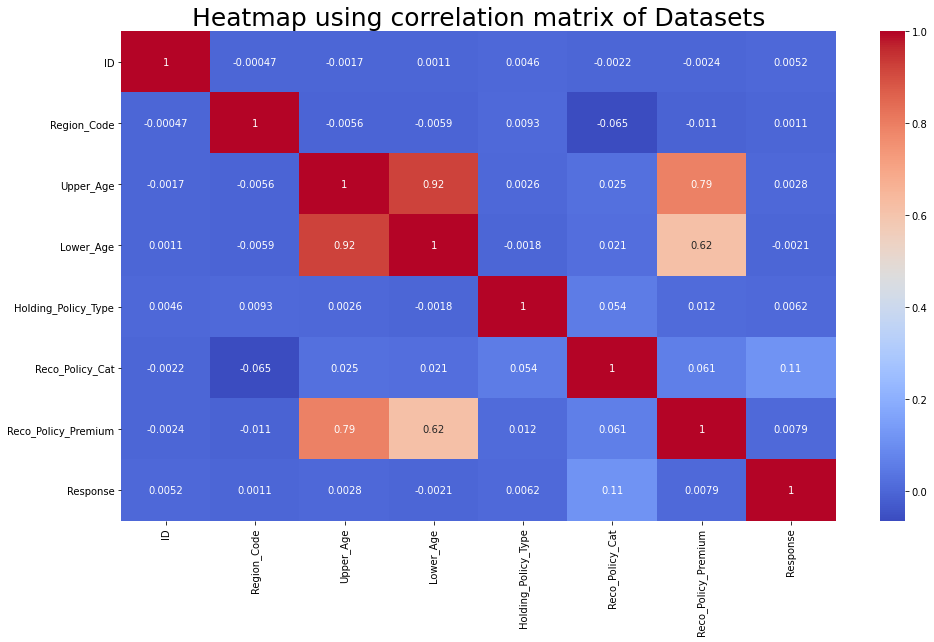

In [ ]:
# Heatmap
plt.figure(figsize=(16,9)) # heatmap size in ratio 16:9
 
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm') # show heatmap
 
plt.title("Heatmap using correlation matrix of Datasets", fontsize = 25) # title of heatmap


In [ ]:
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace(r'\W',"")

In [ ]:
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].astype(str).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         50882 non-null  object 
 9   Holding_Policy_Duration  50882 non-null  int64  
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(7

In [ ]:
columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator']

In [ ]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [ ]:
main_df=df.copy()

In [ ]:
test_df=pd.read_csv('/content/drive/My Drive/Project/AnalyticVidya/formulatedtest.csv')

In [ ]:
final_df=pd.concat([df,test_df],axis=0)

In [ ]:
final_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14,3.0,22,11628.0,0.0
1,2,C5,1117,Owned,Joint,75,22,No,X2,14,3.0,22,30510.0,0.0
2,3,C5,3732,Owned,Individual,32,32,No,X1,10,1.0,19,7450.0,1.0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14,3.0,19,17780.0,0.0
4,5,C8,2190,Rented,Individual,44,44,No,X2,30,1.0,16,10404.0,0.0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   City_Code                72687 non-null  object 
 2   Region_Code              72687 non-null  int64  
 3   Accomodation_Type        72687 non-null  object 
 4   Reco_Insurance_Type      72687 non-null  object 
 5   Upper_Age                72687 non-null  int64  
 6   Lower_Age                72687 non-null  int64  
 7   Is_Spouse                72687 non-null  object 
 8   Health Indicator         72687 non-null  object 
 9   Holding_Policy_Duration  72687 non-null  int64  
 10  Holding_Policy_Type      72687 non-null  float64
 11  Reco_Policy_Cat          72687 non-null  int64  
 12  Reco_Policy_Premium      72687 non-null  float64
 13  Response                 50882 non-null  float64
dtypes: float64(3), int64(6

In [ ]:
final_df=category_onehot_multcols(columns)

City_Code
Accomodation_Type
Reco_Insurance_Type
Is_Spouse
Health Indicator


In [ ]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
df_Train=final_df.iloc[:50882,:]
df_Test=final_df.iloc[50882:,:]

In [ ]:
df_Train.head()


,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C2,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C3,C30,C31,C32,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9,Rented,Joint,Yes,X2,X3,X4,X5,X6,X7,X8,X9
0,1,3213,36,36,14,3.0,22,11628.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,1117,75,22,14,3.0,22,30510.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,3,3732,32,32,10,1.0,19,7450.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,4378,52,48,14,3.0,19,17780.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5,2190,44,44,30,1.0,16,10404.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0


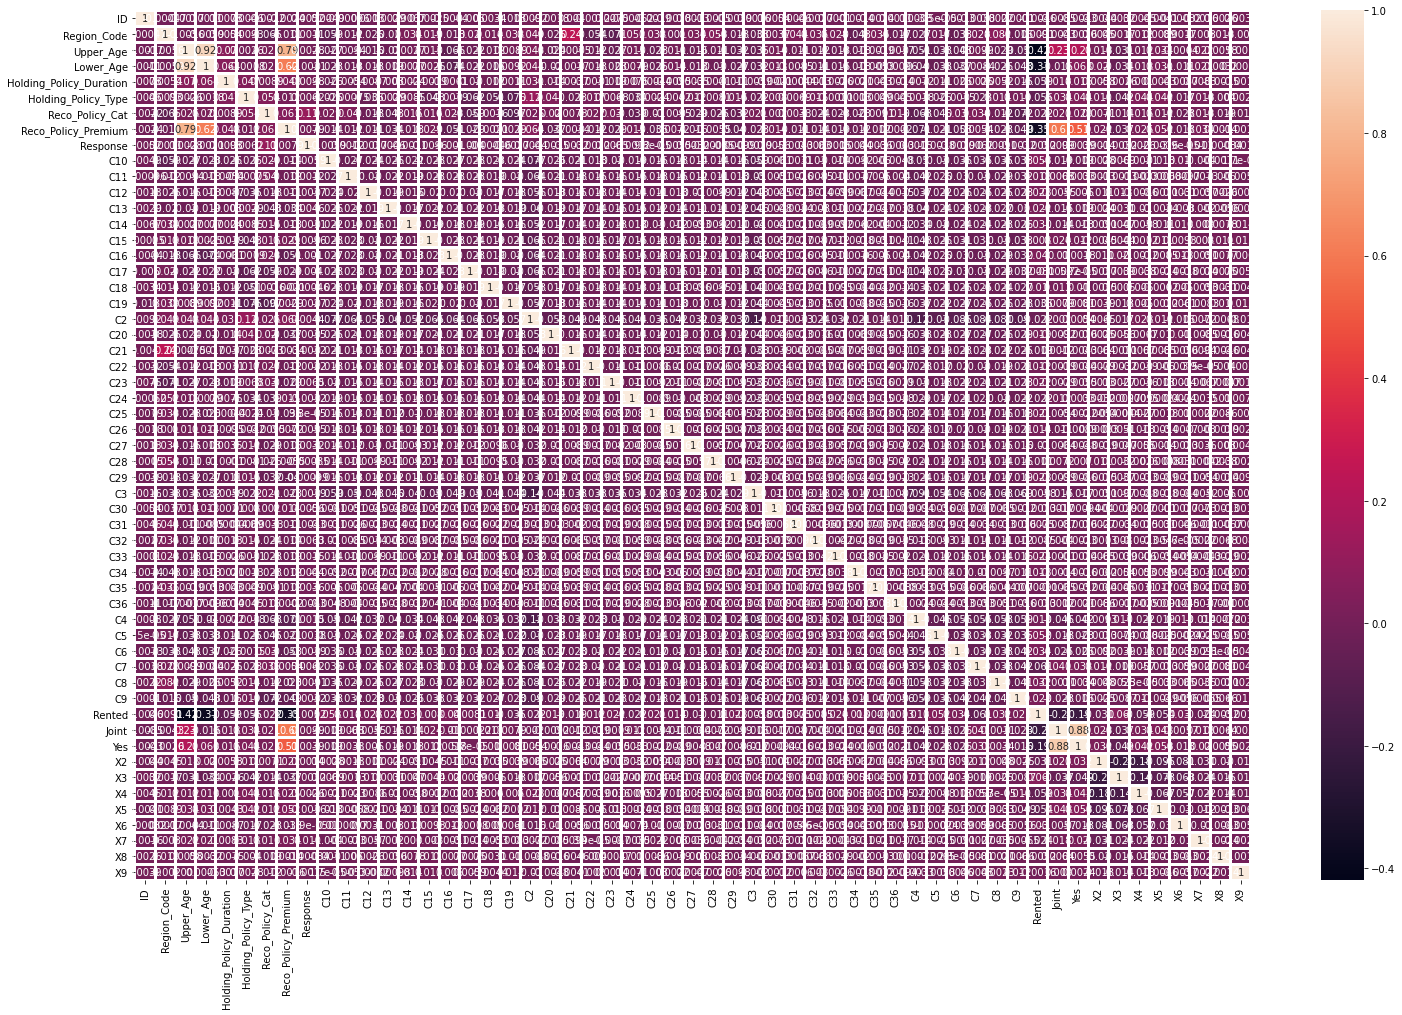

In [ ]:
# Heatmap with correlation matrix of new Train datasets
 
plt.figure(figsize = (25,16)) 
sns.heatmap(df_Train.corr(), annot = True, linewidth =2)

In [ ]:
X_train=df_Train.drop(['Response'],axis=1)
y_train=df_Train['Response']

In [ ]:
y=df_Test['Response']

In [ ]:
df_Test.drop(['Response'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train1=X_train.copy()

In [ ]:
X_train2=X_train1.drop(['ID','Upper_Age','Joint','Yes'],axis=1)

In [ ]:
df_Test1=df_Test.drop(['ID','Upper_Age','Joint','Yes'],axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
   learning_rate =0.01,
   n_estimators=5000,
   max_depth=4,
   min_child_weight=6,
   gamma=0,
   subsample=0.8,
   colsample_bytree=0.8,
   reg_alpha=0.005,
   objective= 'binary:logistic',
  nthread=4,
  scale_pos_weight=1,
  seed=27
)
xgb_model.fit(X_train2, y_train)
y_pred_xgb = xgb_model.predict(X_train2)
accuracy_score(y_train, y_pred_xgb)

0.7695648755945128

In [ ]:
y_pred=xgb_model.predict(df_Test1)

In [ ]:
df_Test['Response']=y_pred
submission=pd.DataFrame()
submission['ID']=df_Test.ID
submission['Response']=df_Test.Response


submission.to_csv('/content/drive/My Drive/Project/AnalyticVidya/final_submission71.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train2, y_train)
y_pred_dt = dt_model.predict(X_train2)


In [ ]:
y_pred1=dt_model.predict(df_Test1)

In [ ]:
df_Test['Response']=y_pred1
submission=pd.DataFrame()
submission['ID']=df_Test.ID
submission['Response']=df_Test.Response


submission.to_csv('/content/drive/My Drive/Project/AnalyticVidya/final_submission8.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train2, y_train)
y_pred_nb = nb_model.predict(X_train2)
 
accuracy_score(y_train, y_pred_nb)

0.7600526708855784